## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.4ms	remaining: 58.4s
1:	learn: 0.9606716	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9390920	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9046978	total: 63.1ms	remaining: 12.6s
5:	learn: 0.8896854	total: 64.5ms	remaining: 10.7s
6:	learn: 0.8724151	total: 65.7ms	remaining: 9.32s
7:	learn: 0.8558633	total: 66.8ms	remaining: 8.28s
8:	learn: 0.8400199	total: 67.9ms	remaining: 7.47s
9:	learn: 0.8229065	total: 68.9ms	remaining: 6.82s
10:	learn: 0.8057776	total: 69.7ms	remaining: 6.27s
11:	learn: 0.7907426	total: 70.7ms	remaining: 5.82s
12:	learn: 0.7753485	total: 71.7ms	remaining: 5.44s
13:	learn: 0.7601130	total: 72.6ms	remaining: 5.11s
14:	learn: 0.7475256	total: 73.6ms	remaining: 4.83s
15:	learn: 0.7326054	total: 74.6ms	remaining: 4.59s
16:	learn: 0.7206853	total: 75.5ms	remaining: 4.37s
17:	learn: 0.7077303	total: 76.4ms	remaining: 4.17s
18:	learn: 0.6955287	total: 77.2ms	remaining

97:	learn: 0.3114186	total: 149ms	remaining: 1.37s
98:	learn: 0.3101878	total: 150ms	remaining: 1.37s
99:	learn: 0.3091652	total: 151ms	remaining: 1.36s
100:	learn: 0.3073446	total: 152ms	remaining: 1.35s
101:	learn: 0.3059717	total: 153ms	remaining: 1.34s
102:	learn: 0.3044976	total: 154ms	remaining: 1.34s
103:	learn: 0.3030824	total: 155ms	remaining: 1.33s
104:	learn: 0.3013455	total: 155ms	remaining: 1.32s
105:	learn: 0.2996238	total: 156ms	remaining: 1.32s
106:	learn: 0.2980370	total: 158ms	remaining: 1.31s
107:	learn: 0.2965967	total: 158ms	remaining: 1.31s
108:	learn: 0.2951864	total: 160ms	remaining: 1.3s
109:	learn: 0.2942861	total: 161ms	remaining: 1.3s
110:	learn: 0.2932928	total: 162ms	remaining: 1.3s
111:	learn: 0.2916150	total: 163ms	remaining: 1.29s
112:	learn: 0.2903158	total: 164ms	remaining: 1.28s
113:	learn: 0.2893044	total: 165ms	remaining: 1.28s
114:	learn: 0.2880453	total: 166ms	remaining: 1.28s
115:	learn: 0.2868924	total: 167ms	remaining: 1.27s
116:	learn: 0.2854

140:	learn: 0.2619103	total: 192ms	remaining: 1.17s
141:	learn: 0.2611219	total: 193ms	remaining: 1.17s
142:	learn: 0.2604558	total: 194ms	remaining: 1.16s
143:	learn: 0.2590422	total: 195ms	remaining: 1.16s
144:	learn: 0.2583398	total: 196ms	remaining: 1.16s
145:	learn: 0.2574131	total: 197ms	remaining: 1.15s
146:	learn: 0.2561256	total: 198ms	remaining: 1.15s
147:	learn: 0.2550767	total: 199ms	remaining: 1.14s
148:	learn: 0.2541599	total: 199ms	remaining: 1.14s
149:	learn: 0.2534840	total: 200ms	remaining: 1.14s
150:	learn: 0.2527124	total: 201ms	remaining: 1.13s
151:	learn: 0.2520669	total: 202ms	remaining: 1.13s
152:	learn: 0.2511829	total: 203ms	remaining: 1.12s
153:	learn: 0.2507161	total: 204ms	remaining: 1.12s
154:	learn: 0.2497802	total: 205ms	remaining: 1.12s
155:	learn: 0.2490613	total: 206ms	remaining: 1.12s
156:	learn: 0.2484356	total: 208ms	remaining: 1.11s
157:	learn: 0.2475208	total: 209ms	remaining: 1.11s
158:	learn: 0.2467460	total: 210ms	remaining: 1.11s
159:	learn: 

283:	learn: 0.1840433	total: 338ms	remaining: 851ms
284:	learn: 0.1835906	total: 338ms	remaining: 849ms
285:	learn: 0.1829193	total: 340ms	remaining: 849ms
286:	learn: 0.1826861	total: 341ms	remaining: 847ms
287:	learn: 0.1823018	total: 342ms	remaining: 845ms
288:	learn: 0.1818488	total: 343ms	remaining: 843ms
289:	learn: 0.1816580	total: 343ms	remaining: 841ms
290:	learn: 0.1812981	total: 345ms	remaining: 840ms
291:	learn: 0.1808362	total: 346ms	remaining: 839ms
292:	learn: 0.1802904	total: 347ms	remaining: 838ms
293:	learn: 0.1798726	total: 348ms	remaining: 837ms
294:	learn: 0.1794921	total: 350ms	remaining: 835ms
295:	learn: 0.1791051	total: 351ms	remaining: 834ms
296:	learn: 0.1788226	total: 352ms	remaining: 832ms
297:	learn: 0.1784691	total: 353ms	remaining: 831ms
298:	learn: 0.1781306	total: 354ms	remaining: 829ms
299:	learn: 0.1778034	total: 355ms	remaining: 827ms
300:	learn: 0.1773609	total: 355ms	remaining: 826ms
301:	learn: 0.1771097	total: 356ms	remaining: 823ms
302:	learn: 

324:	learn: 0.1693707	total: 381ms	remaining: 791ms
325:	learn: 0.1690932	total: 382ms	remaining: 790ms
326:	learn: 0.1687871	total: 383ms	remaining: 788ms
327:	learn: 0.1684932	total: 384ms	remaining: 786ms
328:	learn: 0.1680740	total: 385ms	remaining: 784ms
329:	learn: 0.1676495	total: 385ms	remaining: 783ms
330:	learn: 0.1672606	total: 386ms	remaining: 781ms
331:	learn: 0.1669891	total: 387ms	remaining: 779ms
332:	learn: 0.1666284	total: 388ms	remaining: 777ms
333:	learn: 0.1664670	total: 389ms	remaining: 776ms
334:	learn: 0.1660441	total: 390ms	remaining: 774ms
335:	learn: 0.1657088	total: 391ms	remaining: 772ms
336:	learn: 0.1653987	total: 392ms	remaining: 771ms
337:	learn: 0.1652355	total: 393ms	remaining: 770ms
338:	learn: 0.1648615	total: 394ms	remaining: 768ms
339:	learn: 0.1646361	total: 395ms	remaining: 767ms
340:	learn: 0.1643424	total: 396ms	remaining: 766ms
341:	learn: 0.1641025	total: 398ms	remaining: 765ms
342:	learn: 0.1637969	total: 399ms	remaining: 764ms
343:	learn: 

465:	learn: 0.1346620	total: 525ms	remaining: 601ms
466:	learn: 0.1345466	total: 526ms	remaining: 600ms
467:	learn: 0.1344229	total: 527ms	remaining: 599ms
468:	learn: 0.1343417	total: 528ms	remaining: 598ms
469:	learn: 0.1342234	total: 529ms	remaining: 596ms
470:	learn: 0.1339371	total: 530ms	remaining: 595ms
471:	learn: 0.1336950	total: 530ms	remaining: 593ms
472:	learn: 0.1335484	total: 532ms	remaining: 592ms
473:	learn: 0.1333265	total: 533ms	remaining: 592ms
474:	learn: 0.1329765	total: 534ms	remaining: 591ms
475:	learn: 0.1327590	total: 536ms	remaining: 590ms
476:	learn: 0.1326175	total: 537ms	remaining: 589ms
477:	learn: 0.1323752	total: 538ms	remaining: 587ms
478:	learn: 0.1321612	total: 539ms	remaining: 586ms
479:	learn: 0.1319673	total: 540ms	remaining: 585ms
480:	learn: 0.1317569	total: 541ms	remaining: 583ms
481:	learn: 0.1316297	total: 542ms	remaining: 582ms
482:	learn: 0.1313648	total: 542ms	remaining: 581ms
483:	learn: 0.1311941	total: 543ms	remaining: 579ms
484:	learn: 

507:	learn: 0.1268447	total: 568ms	remaining: 550ms
508:	learn: 0.1266565	total: 569ms	remaining: 549ms
509:	learn: 0.1265379	total: 570ms	remaining: 547ms
510:	learn: 0.1264936	total: 570ms	remaining: 546ms
511:	learn: 0.1263041	total: 571ms	remaining: 544ms
512:	learn: 0.1260636	total: 572ms	remaining: 543ms
513:	learn: 0.1257801	total: 573ms	remaining: 542ms
514:	learn: 0.1254765	total: 574ms	remaining: 541ms
515:	learn: 0.1254352	total: 575ms	remaining: 539ms
516:	learn: 0.1252340	total: 576ms	remaining: 538ms
517:	learn: 0.1252031	total: 577ms	remaining: 537ms
518:	learn: 0.1250256	total: 578ms	remaining: 536ms
519:	learn: 0.1247722	total: 579ms	remaining: 535ms
520:	learn: 0.1245918	total: 580ms	remaining: 533ms
521:	learn: 0.1243609	total: 581ms	remaining: 532ms
522:	learn: 0.1243283	total: 582ms	remaining: 531ms
523:	learn: 0.1241885	total: 583ms	remaining: 530ms
524:	learn: 0.1240465	total: 584ms	remaining: 528ms
525:	learn: 0.1238986	total: 585ms	remaining: 527ms
526:	learn: 

652:	learn: 0.1030217	total: 713ms	remaining: 379ms
653:	learn: 0.1029084	total: 714ms	remaining: 378ms
654:	learn: 0.1027865	total: 715ms	remaining: 376ms
655:	learn: 0.1026377	total: 716ms	remaining: 375ms
656:	learn: 0.1024663	total: 717ms	remaining: 374ms
657:	learn: 0.1023564	total: 718ms	remaining: 373ms
658:	learn: 0.1022165	total: 719ms	remaining: 372ms
659:	learn: 0.1021026	total: 720ms	remaining: 371ms
660:	learn: 0.1019260	total: 720ms	remaining: 370ms
661:	learn: 0.1019064	total: 722ms	remaining: 369ms
662:	learn: 0.1017878	total: 723ms	remaining: 367ms
663:	learn: 0.1016055	total: 724ms	remaining: 366ms
664:	learn: 0.1014539	total: 725ms	remaining: 365ms
665:	learn: 0.1013474	total: 726ms	remaining: 364ms
666:	learn: 0.1011682	total: 727ms	remaining: 363ms
667:	learn: 0.1009977	total: 728ms	remaining: 362ms
668:	learn: 0.1009651	total: 729ms	remaining: 361ms
669:	learn: 0.1008481	total: 730ms	remaining: 359ms
670:	learn: 0.1006584	total: 731ms	remaining: 358ms
671:	learn: 

696:	learn: 0.0975536	total: 757ms	remaining: 329ms
697:	learn: 0.0974148	total: 758ms	remaining: 328ms
698:	learn: 0.0973816	total: 758ms	remaining: 327ms
699:	learn: 0.0973531	total: 759ms	remaining: 325ms
700:	learn: 0.0972431	total: 760ms	remaining: 324ms
701:	learn: 0.0970350	total: 761ms	remaining: 323ms
702:	learn: 0.0969911	total: 762ms	remaining: 322ms
703:	learn: 0.0969461	total: 763ms	remaining: 321ms
704:	learn: 0.0968824	total: 763ms	remaining: 319ms
705:	learn: 0.0967427	total: 764ms	remaining: 318ms
706:	learn: 0.0966381	total: 765ms	remaining: 317ms
707:	learn: 0.0966189	total: 766ms	remaining: 316ms
708:	learn: 0.0965242	total: 767ms	remaining: 315ms
709:	learn: 0.0964063	total: 768ms	remaining: 314ms
710:	learn: 0.0961943	total: 769ms	remaining: 313ms
711:	learn: 0.0960212	total: 770ms	remaining: 312ms
712:	learn: 0.0958473	total: 771ms	remaining: 310ms
713:	learn: 0.0957051	total: 772ms	remaining: 309ms
714:	learn: 0.0955957	total: 773ms	remaining: 308ms
715:	learn: 

858:	learn: 0.0804940	total: 902ms	remaining: 148ms
859:	learn: 0.0803861	total: 903ms	remaining: 147ms
860:	learn: 0.0802630	total: 904ms	remaining: 146ms
861:	learn: 0.0801384	total: 905ms	remaining: 145ms
862:	learn: 0.0800363	total: 906ms	remaining: 144ms
863:	learn: 0.0799262	total: 907ms	remaining: 143ms
864:	learn: 0.0798177	total: 908ms	remaining: 142ms
865:	learn: 0.0797306	total: 908ms	remaining: 141ms
866:	learn: 0.0796064	total: 909ms	remaining: 139ms
867:	learn: 0.0794757	total: 910ms	remaining: 138ms
868:	learn: 0.0793358	total: 911ms	remaining: 137ms
869:	learn: 0.0792167	total: 912ms	remaining: 136ms
870:	learn: 0.0791111	total: 913ms	remaining: 135ms
871:	learn: 0.0790015	total: 914ms	remaining: 134ms
872:	learn: 0.0789479	total: 915ms	remaining: 133ms
873:	learn: 0.0788482	total: 915ms	remaining: 132ms
874:	learn: 0.0787936	total: 916ms	remaining: 131ms
875:	learn: 0.0786756	total: 917ms	remaining: 130ms
876:	learn: 0.0785800	total: 918ms	remaining: 129ms
877:	learn: 

908:	learn: 0.0759044	total: 948ms	remaining: 94.9ms
909:	learn: 0.0758260	total: 949ms	remaining: 93.8ms
910:	learn: 0.0757466	total: 949ms	remaining: 92.8ms
911:	learn: 0.0756545	total: 950ms	remaining: 91.7ms
912:	learn: 0.0755761	total: 951ms	remaining: 90.6ms
913:	learn: 0.0754685	total: 952ms	remaining: 89.6ms
914:	learn: 0.0753754	total: 953ms	remaining: 88.5ms
915:	learn: 0.0752357	total: 954ms	remaining: 87.5ms
916:	learn: 0.0751262	total: 955ms	remaining: 86.4ms
917:	learn: 0.0750420	total: 956ms	remaining: 85.4ms
918:	learn: 0.0749671	total: 957ms	remaining: 84.3ms
919:	learn: 0.0749564	total: 958ms	remaining: 83.3ms
920:	learn: 0.0748830	total: 959ms	remaining: 82.2ms
921:	learn: 0.0748001	total: 960ms	remaining: 81.2ms
922:	learn: 0.0747917	total: 960ms	remaining: 80.1ms
923:	learn: 0.0746813	total: 961ms	remaining: 79.1ms
924:	learn: 0.0746429	total: 962ms	remaining: 78ms
925:	learn: 0.0745022	total: 963ms	remaining: 77ms
926:	learn: 0.0743951	total: 964ms	remaining: 75.9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.060066521223763596


#### Sanity Checks 

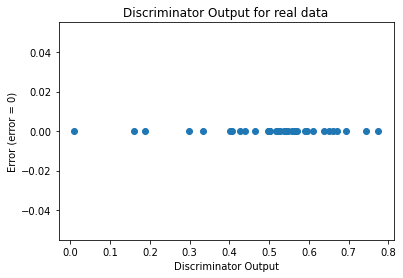

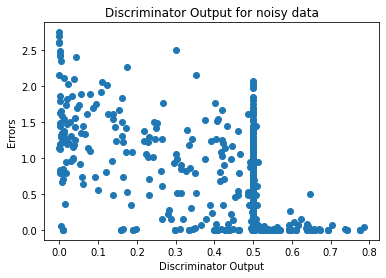

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 42


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.1002321801451363


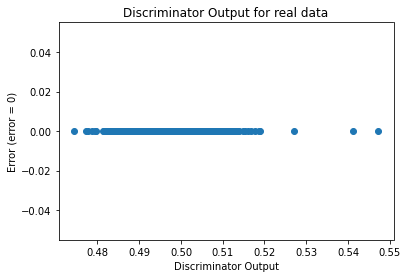

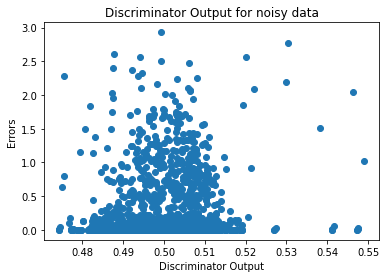

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005693340933910462


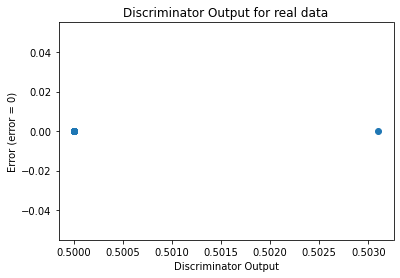

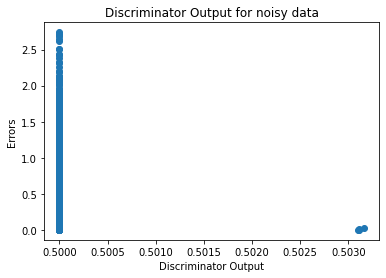

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
